# Appendix – Python Implementation of ML Model in Jupyter Notebook

# Heart Failure Prediction ML Model Notebook

# Importing Libraries

In [1]:
import pandas as pd

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import plotly.express as px
import octopus_ml as oc

# Importing Dataset

In [4]:
dataset = pd.read_csv('heart.csv')

In [5]:
dataset.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


# Dataset Describe

In [6]:
dataset.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


# Graphs

In [55]:
def num_plot(df, col):
    fig = px.histogram(df, x=col, color="HeartDisease",
                       marginal="box")
    fig.update_layout(height=300, width=400, showlegend=True)
    fig.update_traces(marker_line_width=1,marker_line_color="black")
    fig.show()
    
for col in dataset[:-1]:
    num_plot(dataset,col)

C:\Users\PARITOSH MISHRA\anaconda3\lib\site-packages\octopus_ml\octopus_ml.py:199: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



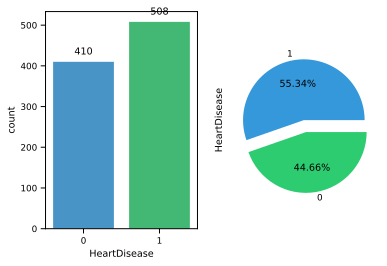

<Figure size 144x216 with 0 Axes>

In [8]:
oc.label_dist(dataset,'HeartDisease')

# Analyzing Data and Converting it to ML Model fitted form 

# DataType And NullValues

In [9]:
dataset.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [10]:
dataset.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
le = LabelEncoder()
dataset['Sex'] = le.fit_transform(dataset['Sex'])

In [13]:
dataset.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,0,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,1,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,0,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,1,NAP,150,195,0,Normal,122,N,0.0,Up,0


# Unique Values of Dataset

In [14]:
dataset.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [15]:
dataset['ChestPainType'].value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

In [16]:
dataset['RestingECG'].value_counts()

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

In [17]:
dataset['ST_Slope'].value_counts()

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64

# Taking out Result set

In [18]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## One Hot Encoder for Encoding Categorical Variable

In [19]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(),[2])], remainder='passthrough')
X = pd.DataFrame(ct.fit_transform(X))

In [20]:
X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.0,1.0,0.0,0.0,40,1,140,289,0,Normal,172,N,0.0,Up
1,0.0,0.0,1.0,0.0,49,0,160,180,0,Normal,156,N,1.0,Flat
2,0.0,1.0,0.0,0.0,37,1,130,283,0,ST,98,N,0.0,Up
3,1.0,0.0,0.0,0.0,48,0,138,214,0,Normal,108,Y,1.5,Flat
4,0.0,0.0,1.0,0.0,54,1,150,195,0,Normal,122,N,0.0,Up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,0.0,0.0,0.0,1.0,45,1,110,264,0,Normal,132,N,1.2,Flat
914,1.0,0.0,0.0,0.0,68,1,144,193,1,Normal,141,N,3.4,Flat
915,1.0,0.0,0.0,0.0,57,1,130,131,0,Normal,115,Y,1.2,Flat
916,0.0,1.0,0.0,0.0,57,0,130,236,0,LVH,174,N,0.0,Flat


In [21]:
ct1 = ColumnTransformer(transformers=[('encoder', OneHotEncoder(),[9])], remainder='passthrough')
X = pd.DataFrame(ct1.fit_transform(X))

In [22]:
ct3 = ColumnTransformer(transformers=[('encoder', OneHotEncoder(),[15])], remainder='passthrough')
X = pd.DataFrame(ct3.fit_transform(X))

In [23]:
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,40,1,140,289,0,172,N,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,49,0,160,180,0,156,N,1.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,37,1,130,283,0,98,N,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,48,0,138,214,0,108,Y,1.5
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,54,1,150,195,0,122,N,0.0


## Label Encoder for Y/N

In [24]:
le1 = LabelEncoder()
X[16] = le1.fit_transform(X[16])

In [25]:
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,40,1,140,289,0,172,0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,49,0,160,180,0,156,0,1.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,37,1,130,283,0,98,0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,48,0,138,214,0,108,1,1.5
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,54,1,150,195,0,122,0,0.0


In [26]:
# X = dataset.iloc[:, :-1].values
# y = dataset.iloc[:, -1].values

# Spliting Dataset in training and test set

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [28]:
X_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
852,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,43,1,120,177,0,120,1,2.5
121,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,52,0,125,272,0,139,0,0.0
664,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,65,0,150,225,0,114,0,1.0
187,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,41,1,120,237,1,138,1,1.0
108,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,50,1,140,129,0,135,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
767,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,54,0,108,267,0,167,0,0.0
72,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,52,1,120,182,0,150,0,0.0
908,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,63,1,140,187,0,144,1,4.0
235,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,39,1,120,200,0,160,1,1.0


# Feature Scaling

In [29]:
from sklearn.preprocessing import StandardScaler
sc1 = StandardScaler()
X_train.iloc[:, 10:11] = sc1.fit_transform(X_train.iloc[:, 10:11])
X_test.iloc[:, 10:11] = sc1.transform(X_test.iloc[:, 10:11])

C:\Users\PARITOSH MISHRA\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\PARITOSH MISHRA\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [30]:
sc2 = StandardScaler()
X_train.iloc[:, 12:14] = sc2.fit_transform(X_train.iloc[:, 12:14])
X_test.iloc[:, 12:14] = sc2.transform(X_test.iloc[:, 12:14])

C:\Users\PARITOSH MISHRA\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\PARITOSH MISHRA\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [31]:
sc3 = StandardScaler()
X_train.iloc[:, 15:16] = sc3.fit_transform(X_train.iloc[:, 15:16])
X_test.iloc[:, 15:16] = sc3.transform(X_test.iloc[:, 15:16])

C:\Users\PARITOSH MISHRA\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\PARITOSH MISHRA\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [32]:
X_train = pd.DataFrame(X_train)

In [33]:
y_train=y_train.astype(int)
y_test=y_test.astype(int)

# MODEL

In [34]:
# from sklearn.linear_model import LogisticRegression
# classifier = LogisticRegression(random_state = 0)
# from sklearn.neighbors import KNeighborsClassifier
# classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf',C = 0.75, gamma= 0.2, random_state = 42,probability=True)
# from sklearn.naive_bayes import GaussianNB
# classifier = GaussianNB()
# from sklearn.tree import DecisionTreeClassifier
# classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
# from sklearn.ensemble import RandomForestClassifier
# classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
# from xgboost import XGBClassifier
# classifier = XGBClassifier()
# from sklearn.ensemble import ExtraTreesClassifier
# classifier = ExtraTreesClassifier()
classifier.fit(X_train, y_train)

SVC(C=0.75, gamma=0.2, probability=True, random_state=42)

In [35]:
y_pred = classifier.predict(X_test)

# Analysis of Model

In [36]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [37]:
accuracy_score(y_test, y_pred)*100

90.21739130434783

In [38]:
confusion_matrix(y_test,y_pred)

array([[ 63,  11],
       [  7, 103]], dtype=int64)

<Figure size 432x288 with 0 Axes>

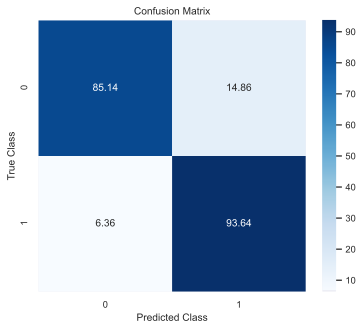

<Figure size 432x288 with 0 Axes>

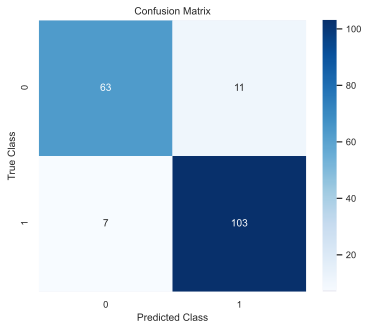

In [39]:
oc.confusion_matrix_plot(y_test, y_pred)

In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.85      0.88        74
           1       0.90      0.94      0.92       110

    accuracy                           0.90       184
   macro avg       0.90      0.89      0.90       184
weighted avg       0.90      0.90      0.90       184



# K-Fold Cross Validation

In [41]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 86.52 %
Standard Deviation: 3.92 %


# HyperParameter Tuning

## Grid Search

In [42]:
def gridSearch():
    from sklearn.model_selection import GridSearchCV
    parameters = [{'C': [0.25, 0.5, 0.75, 1], 'kernel': ['linear']},
                  {'C': [0.25, 0.5, 0.75, 1], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
    grid_search = GridSearchCV(estimator = classifier,param_grid = parameters,scoring = 'accuracy',cv = 10,n_jobs = -1)
    grid_search.fit(X_train, y_train)
    best_accuracy = grid_search.best_score_
    best_parameters = grid_search.best_params_
    print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
    print("Best Parameters:", best_parameters)

In [43]:
gridSearch()

Best Accuracy: 86.52 %
Best Parameters: {'C': 0.75, 'gamma': 0.1, 'kernel': 'rbf'}


In [44]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
852,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.116200,1,-0.705742,-0.182317,0,-0.684584,1,2.5
121,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,-0.149549,0,-0.424304,0.672796,0,0.069659,0,0.0
664,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.246726,0,0.982886,0.249740,0,-0.922766,0,1.0
187,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,-1.331011,1,-0.705742,0.357755,1,0.029962,1,1.0
108,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,-0.364360,1,0.420010,-0.614375,0,-0.089129,0,0.0


# Creating Pickel File

In [48]:
def createPickel():
    import pickle
    file =open('HDClassifier.pkl','wb')
    pickle.dump(classifier,file)
    
    file =open('le.pkl','wb')
    pickle.dump(le,file)
    file.close()
    
    file =open('ct.pkl','wb')
    pickle.dump(ct,file)
    file.close()
    file =open('ct1.pkl','wb')
    pickle.dump(ct1,file)
    file.close()
    
    file =open('ct3.pkl','wb')
    pickle.dump(ct3,file)
    file.close()
    
    file =open('sc1.pkl','wb')
    pickle.dump(sc1,file)
    file.close()
    
    file =open('sc2.pkl','wb')
    pickle.dump(sc2,file)
    file.close()
    
    file =open('sc3.pkl','wb')
    pickle.dump(sc3,file)
    file.close()


In [49]:
# createPickel()

# CAP Analysis

In [50]:
def CAP_Analysis():
    total = len(y_test)

    # Counting '1' labels in test data
    one_count = np.sum(y_test)

    # counting '0' labels in test data
    zero_count = total - one_count

    plt.figure(figsize = (10, 6))

    # x-axis ranges from 0 to total people diseases
    # y-axis ranges from 0 to the total undiseased.

    plt.plot([0, total], [0, one_count], c = 'b',linestyle = '--', label = 'Random Model')

    lm = [y for _, y in sorted(zip(y_pred, y_test), reverse = True)]
    x = np.arange(0, total + 1)
    y = np.append([0], np.cumsum(lm))
    plt.plot(x, y, c = 'b', label = 'SVC', linewidth = 2)
    plt.plot([0, one_count, total], [0, one_count, one_count],c = 'grey', linewidth = 2, label = 'Perfect Model')
    plt.title('CAP Analysis')
    plt.xlabel('Total Prediction')
    plt.ylabel('Total Diseases Prediction')
    plt.legend()

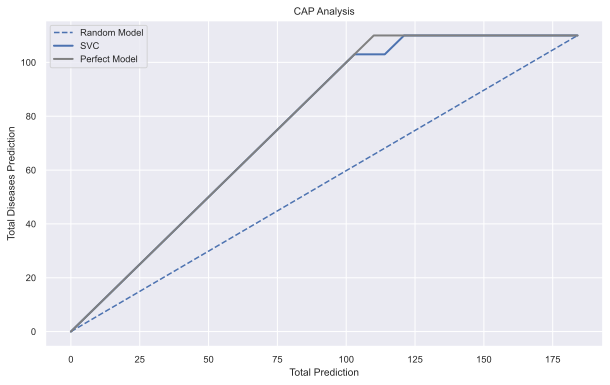

In [51]:
CAP_Analysis()